# I/O

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import shutil
import os
from imblearn.over_sampling import SMOTE
import sys
from sklearn.ensemble import BaggingClassifier
import cv2
import numpy as np
import cv2
import os
from scipy import ndimage
from sklearn.neural_network import MLPClassifier
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from os import listdir
from matplotlib import image
from natsort import natsorted
import pandas as pd 

In [3]:
# data = mpimg.imread('./bonus-sml-2020/SML_Train/Train_9.jpg') 
# print(data.dtype)
# print(data.shape)
# # display the array of pixels as an image
# plt.imshow(data)
# plt.show()

In [4]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        loaded_images.append(img_data.flatten())
    return loaded_images

In [5]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (12288,)
No of images: (16000, 12288)
Train label: 16000
<class 'numpy.ndarray'>


In [5]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 12288)


In [6]:
def helper(direc):
    files=[]
    for filename in natsorted(listdir(direc)):
        files.append(filename)
    return files

In [ ]:
files=helper('./bonus-sml-2020/SML_Test/')
data_res=pd.DataFrame()
data_res['id']=files
data_res['category']=y_test
data_res.to_csv (r'sample_submission.csv', index = False, header=True)

# 26

In [6]:
pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
model = make_pipeline(pca, svc)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)


In [13]:
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)
    smt = SMOTE(random_state=42)
    X_train, y_train = smt.fit_sample(X_train,y_train)
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)

{0: 576, 1: 669, 2: 486, 3: 682, 4: 982, 5: 649, 6: 448, 7: 454, 8: 848, 9: 529, 10: 883, 11: 448, 12: 539, 13: 515, 14: 515, 15: 493, 16: 834, 17: 797, 18: 705, 19: 860, 20: 553, 21: 573, 22: 518, 23: 631, 24: 813}
{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [ ]:
# %time grid.fit(X_train, y_train)
# %time model.fit(X_train, y_train) #27
constant_filter = StandardScaler()
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
#bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=314)
model = make_pipeline(constant_filter,pca, svc)
%time model.fit(X_train, y_train) # 28

In [8]:
    #       %time grid.fit(X_train, y_train)
    #       %time model.fit(X_train, y_train) #27
    constant_filter = StandardScaler()
    pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
    svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
    bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=314)
    model = make_pipeline(constant_filter,pca, bag)
    print(model)
    #%time model.fit(X_train, y_train) # 28

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=SVC(C=5, break_ties=False,
                                                      cache_size=200,
                                                      class_weight='balanced',
                                                      coef0=0.0,
                                                      decision_function_shape='ovr',
                                                      degree=3, gamma=0.005,
                                                      kernel='rbf', max_iter=-1,
                                                      probability=False,
                 

In [21]:
    clf = MLPClassifier(activation='relu',solver='adam', alpha=1e-8,
                    hidden_layer_sizes=(32,32,32), random_state=0)
    constant_filter = StandardScaler()
    pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
    #svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
    #clf=RandomForestClassifier(n_estimators=100)
    #bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=42)
    #model = make_pipeline(constant_filter,pca, svc)
    model = make_pipeline(constant_filter,pca,clf)
    %time model.fit(X_train, y_train)

CPU times: user 2min 24s, sys: 18.6 s, total: 2min 43s
Wall time: 2min


/Users/komal/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=1e-08,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(32, 32, 32),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=0, shuffle=True, solver='adam',
   

In [29]:

    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
    constant_filter = StandardScaler()
    pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
    #svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
    #clf=RandomForestClassifier(n_estimators=100)
    #bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=42)
    #model = make_pipeline(constant_filter,pca, svc)
    model = make_pipeline(constant_filter,pca,gb)
    %time model.fit(X_train, y_train)

CPU times: user 1min 26s, sys: 20.8 s, total: 1min 47s
Wall time: 1min 17s


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.5, loss='deviance',
                                            max_depth=2, max_features=2,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_sampl

In [ ]:
grid.best_estimator_

In [ ]:
print(grid.best_params_)

In [ ]:
#model = grid.best_estimator_
y_test = model.predict(X_test)

In [19]:
print(y_test)

[ 8 10  3 ... 10  2 16]


# 25

In [75]:
constant_filter = StandardScaler()
constant_filter.fit(X_train)
X_train=constant_filter.transform(X_train)
X_test=constant_filter.transform(X_test)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (16000, 12288)
X_test (1500, 12288)


In [76]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [77]:
%time grid.fit(X_train, y_train)

/Users/komal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1h 14min 13s, sys: 3min 30s, total: 1h 17min 44s
Wall time: 2h 11min 2s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=5, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.005, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001,

In [78]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [ ]:
model = grid.best_estimator_
y_test = model.predict(X_test)

In [84]:
print(y_test[0:10])

[18 10  2  9 14  1 16 24  2 12]


# 17

uint8
(64, 64, 3)


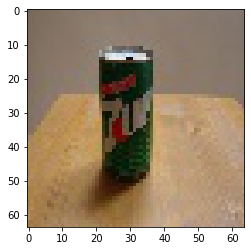

[[105.2902 107.29   109.2898 ... 120.9619 120.9619 120.9619]
 [107.29   108.2899 110.2897 ... 120.9619 119.962  119.962 ]
 [108.2899 109.2898 111.2896 ... 119.962  118.9621 116.9623]
 ...
 [146.9969 134.1292 127.0159 ... 137.8911 151.8466 157.8568]
 [129.3577 125.1301 131.1295 ... 149.118  142.9615 159.8566]
 [126.375  132.1294 125.2163 ... 155.1174 147.602  147.9718]]


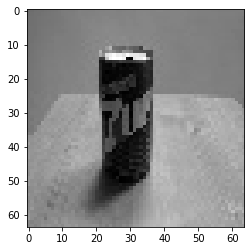

In [119]:
data = mpimg.imread('./bonus-sml-2020/SML_Train/Train_9.jpg') 
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.imshow(data)
plt.show()
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(data[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))
print(grayscale_image)

In [120]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        rgb_weights = [0.2989, 0.5870, 0.1140]
        grayscale_image = np.dot(img_data[...,:3], rgb_weights)
        loaded_images.append(grayscale_image.flatten())
    return loaded_images

In [121]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (4096,)
No of images: (16000, 4096)
Train label: 16000
<class 'numpy.ndarray'>


In [122]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 4096)


In [123]:
# from PIL import Image
# img = Image.fromarray(X_test[0].reshape(64,64))
# img.show()

In [124]:
constant_filter = StandardScaler()
constant_filter.fit(X_train)
X_train=constant_filter.transform(X_train)
X_test=constant_filter.transform(X_test)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (16000, 4096)
X_test (1500, 4096)


In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [126]:
%time grid.fit(X_train, y_train)

/Users/komal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1h 22s, sys: 1min 15s, total: 1h 1min 37s
Wall time: 1h 4min 9s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=5, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.005, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001,

In [127]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.005}


In [128]:
model = grid.best_estimator_
y_test = model.predict(X_test)

In [129]:
print(y_test)

[19 10  9 ...  1 21 16]


# 16

In [2]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        rgb_weights = [0.2989, 0.5870, 0.1140]
        grayscale_image = np.dot(img_data[...,:3], rgb_weights)
        loaded_images.append(grayscale_image.flatten())
    return loaded_images

In [3]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (4096,)
No of images: (16000, 4096)
Train label: 16000
<class 'numpy.ndarray'>


In [4]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 4096)


In [5]:
unique,count=np.unique(y_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 576, 1: 669, 2: 486, 3: 682, 4: 982, 5: 649, 6: 448, 7: 454, 8: 848, 9: 529, 10: 883, 11: 448, 12: 539, 13: 515, 14: 515, 15: 493, 16: 834, 17: 797, 18: 705, 19: 860, 20: 553, 21: 573, 22: 518, 23: 631, 24: 813}


In [6]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
Xs_train, ys_train = smt.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [7]:
unique,count=np.unique(ys_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [8]:
constant_filter = StandardScaler()
constant_filter.fit(Xs_train)
Xs_train=constant_filter.transform(Xs_train)
X_test=constant_filter.transform(X_test)
print("X_train",Xs_train.shape)
print("X_test",X_test.shape)

X_train (24550, 4096)
X_test (1500, 4096)


In [14]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xs_train, ys_train)
print(grid.best_params_)

CPU times: user 21min 20s, sys: 21 s, total: 21min 41s
Wall time: 21min 35s
{'svc__C': 5, 'svc__gamma': 0.005}


In [15]:
model = grid.best_estimator_
y_test = model.predict(X_test)
print(y_test[:100])

[19 17  3 17 16  5 11  3  5 24 24 16  3 13 15 19 10 24 19  9 10 17 20 24
  2 17  9 14 12  9  1  4 19  4 20 10  4 21  3 23  4 20  0 23 20  8  0 24
  3  2 14 22  8 12 16  0 24  9 16 24 18 13  4  4 12 21 19  0 11 12  8 14
  1 22  5 17 18  7  1 15  1  8 23 22 19 13 24  4  5  6 18  3  0  3  1  2
  3  4 13 21]


# 24

In [2]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        loaded_images.append(img_data.flatten())
    return loaded_images

In [3]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (12288,)
No of images: (16000, 12288)
Train label: 16000
<class 'numpy.ndarray'>


In [4]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 12288)


In [5]:
unique,count=np.unique(y_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 576, 1: 669, 2: 486, 3: 682, 4: 982, 5: 649, 6: 448, 7: 454, 8: 848, 9: 529, 10: 883, 11: 448, 12: 539, 13: 515, 14: 515, 15: 493, 16: 834, 17: 797, 18: 705, 19: 860, 20: 553, 21: 573, 22: 518, 23: 631, 24: 813}


In [6]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
Xs_train, ys_train = smt.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [7]:
unique,count=np.unique(ys_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [8]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xs_train, ys_train)
print(grid.best_params_)

CPU times: user 24min 56s, sys: 30.1 s, total: 25min 26s
Wall time: 23min 23s
{'svc__C': 5, 'svc__gamma': 0.005}


In [10]:
print(grid.best_estimator_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=5, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


In [9]:
model = grid.best_estimator_
y_test = model.predict(X_test)
print(y_test[:100])

[11 15  1 11 14  1 12 24 24  7 24 16  3  9  8 24  9 10 19  1 10 15 18 24
  2 20  9  8 12  9  0  5 19  8  3  3  4 16 13 23  5 20 16  1 20  8 22 24
  3  0 16 24 23  4  1 16 23 16 16 24  9  8 17 16 12  8  7  0 24  0  6  9
  1 10 12 18  7  7  1 11  7  7 23  4 24  9 22  5  5  6  0 18 16  3  1 16
  3  3  1 22]


# 21

(64, 64, 4)


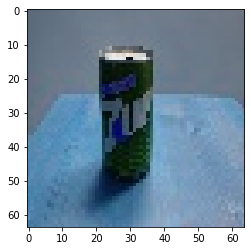

In [24]:
import cv2
image = cv2.imread('./bonus-sml-2020/SML_Train/Train_9.jpg')
image = cv2.cvtColor(image,cv2.IMREAD_GRAYSCALE)
#plotting the image
plt.imshow(image)
print(image.shape)


In [42]:
from numpy import asarray
from PIL import Image
# load image
image = Image.open('./bonus-sml-2020/SML_Train/Train_9.jpg')
pixels = asarray(image)
print(pixels.shape)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels.shape)

(64, 64, 3)
Mean: 120.498
Min: 0.000, Max: 250.000
Mean: 0.000
Min: -120.498, Max: 129.502
(64, 64, 3)


In [13]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =Image.open(direc+filename)
        pixels = asarray(img_data)
        pixels = pixels.astype('float32')
        mean = pixels.mean()
        pixels = pixels - mean
        mean = pixels.mean()
        #print('Mean: %.3f' % mean)
        loaded_images.append(pixels.flatten())
    return loaded_images

In [14]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

NameError: name 'Image' is not defined

In [49]:
print(X_train[1])

[-42.014977   20.985023   11.9850235 ... 118.98502    53.985023
 -74.01498  ]


In [50]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 12288)


In [51]:
unique,count=np.unique(y_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 576, 1: 669, 2: 486, 3: 682, 4: 982, 5: 649, 6: 448, 7: 454, 8: 848, 9: 529, 10: 883, 11: 448, 12: 539, 13: 515, 14: 515, 15: 493, 16: 834, 17: 797, 18: 705, 19: 860, 20: 553, 21: 573, 22: 518, 23: 631, 24: 813}


In [52]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
Xs_train, ys_train = smt.fit_sample(X_train, y_train)

In [53]:
unique,count=np.unique(ys_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [54]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xs_train, ys_train)
print(grid.best_params_)

CPU times: user 20min 59s, sys: 29.9 s, total: 21min 29s
Wall time: 22min 14s
{'svc__C': 5, 'svc__gamma': 0.005}


In [55]:
model = grid.best_estimator_
y_test = model.predict(X_test)
print(y_test[:100])

[14 15  3 15 14 21 11 24 24 14 24 16  3 21 15 24 10 10 19  0 10  7 18 10
  0 20 10  8 18 24 14  3 19  8  3 10  4  2 13 23  5 17 16 23 17  8 22 24
  3  4 16 24  8  4 20 16 18 16 16 24 18 18 15  0 12 21 19  0 24 12  6  9
  1  1  5 18 18  7  1  2  1  8 23  4 24  8 24 21  5 12  0 18 16  3  2 16
  3  3 20 21]


# 23

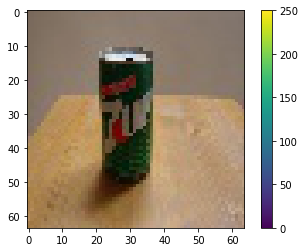

In [75]:
img_data =image.imread('./bonus-sml-2020/SML_Train/Train_9.jpg')
plt.imshow(img_data)
plt.colorbar()
plt.grid(False)
plt.show()


In [2]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        img_data=img_data/255
        loaded_images.append(img_data.flatten())
    return loaded_images

In [3]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (12288,)
No of images: (16000, 12288)
Train label: 16000
<class 'numpy.ndarray'>


In [4]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 12288)


In [5]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
Xs_train, ys_train = smt.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [6]:
unique,count=np.unique(ys_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [8]:
print(X_test[0])

[0.44705882 0.45882353 0.47843137 ... 0.6745098  0.64705882 0.71764706]


In [9]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xs_train, ys_train)
print(grid.best_params_)

CPU times: user 22min 17s, sys: 1min 49s, total: 24min 6s
Wall time: 24min 40s
{'svc__C': 5, 'svc__gamma': 0.005}


In [10]:
model = grid.best_estimator_
y_test = model.predict(X_test)
print(y_test[:100])

[14 15  3 15 14 21 11 24 24 14 24 16  3  9 15 24 10 10 19  9 10 15 18 11
  2 20  9  8 18  8 14 10 19  8  3 10  4 16 13 23  5 17  0 23 17  8 22 18
  3 10 16 24  8  4  1 16 24 16 16 24 13 18 17  0 12  8 19  0 24 12  8  9
  1  1 23 24  7  7  9 15 24  8 23 21 24  8 24 21  5  6  0 18 16  3 23 16
  3  3 20 21]


In [102]:
# constant_filter = StandardScaler()
# constant_filter.fit(X_train)
# X_train=constant_filter.transform(X_train)
# #X_test=constant_filter.transform(X_test)
# print("X_train",X_train.shape)
# #print("X_test",X_test.shape)

X_train (16000, 12288)


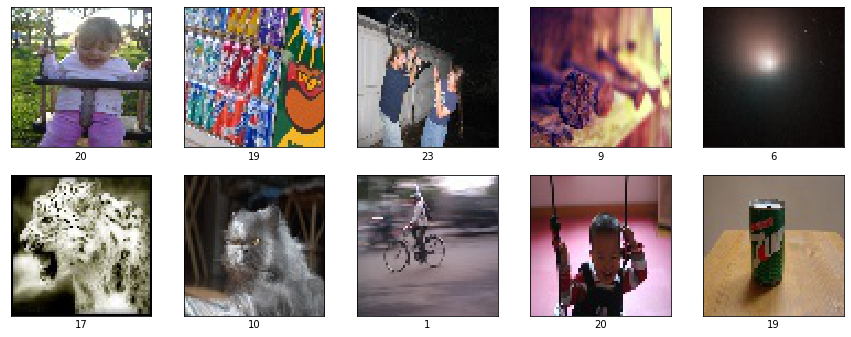

In [96]:
# #/255
# plt.figure(figsize=(15,15))
# for i in range(0,10):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((64, 64,3)),cmap=plt.cm.binary)
#     plt.xlabel(y_train[i])

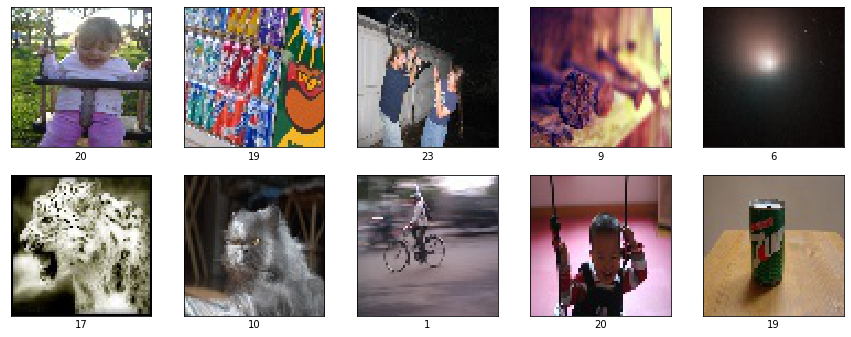

In [99]:
# #original
# plt.figure(figsize=(15,15))
# for i in range(0,10):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((64, 64,3)),cmap=plt.cm.binary)
#     plt.xlabel(y_train[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

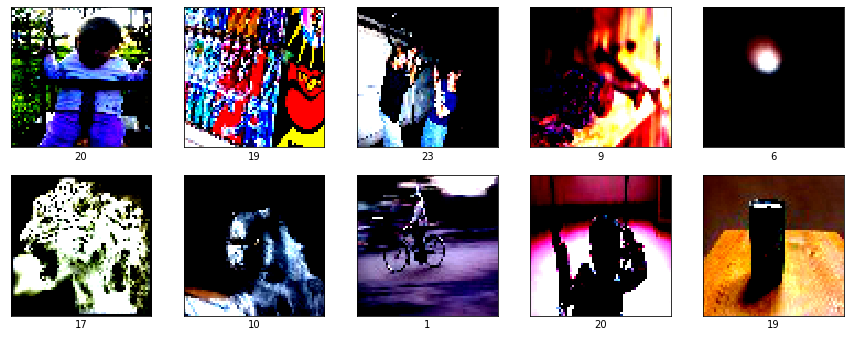

In [103]:
# #result of standard sclar
# plt.figure(figsize=(15,15))
# for i in range(0,10):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((64, 64,3)),cmap=plt.cm.binary)
#     plt.xlabel(y_train[i])

# 25

In [16]:
def readImages(direc):
    loaded_images = []
    for filename in natsorted(listdir(direc)):
        img_data =image.imread(direc+ filename)
        #img_data=img_data/255
        loaded_images.append(img_data.flatten())
    return loaded_images

In [17]:
X_train=readImages('./bonus-sml-2020/SML_Train/')
y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
y_train=y_train.to_numpy()
X_train=np.asarray(X_train)
print("Lnegth of images:",X_train[0].shape)
print("No of images:",X_train.shape)
print("Train label:",len(y_train))
print(type(X_train))

Lnegth of images: (12288,)
No of images: (16000, 12288)
Train label: 16000
<class 'numpy.ndarray'>


In [18]:
X_test=readImages('./bonus-sml-2020/SML_Test/')
X_test=np.asarray(X_test)
print("No of images:",X_test.shape)

No of images: (1500, 12288)


In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
Xs_train, ys_train = smt.fit_sample(X_train, y_train)

In [20]:
unique,count=np.unique(ys_train,return_counts=True)
temp_dict={k:v for(k,v) in zip(unique,count)}
print(temp_dict)

{0: 982, 1: 982, 2: 982, 3: 982, 4: 982, 5: 982, 6: 982, 7: 982, 8: 982, 9: 982, 10: 982, 11: 982, 12: 982, 13: 982, 14: 982, 15: 982, 16: 982, 17: 982, 18: 982, 19: 982, 20: 982, 21: 982, 22: 982, 23: 982, 24: 982}


In [21]:
constant_filter = StandardScaler()
constant_filter.fit(Xs_train)
Xs_train=constant_filter.transform(Xs_train)
X_test=constant_filter.transform(X_test)
print("X_train",Xs_train.shape)
print("X_test",X_test.shape)

X_train (24550, 12288)
X_test (1500, 12288)


In [22]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xs_train, ys_train)
print(grid.best_params_)

CPU times: user 24min 26s, sys: 1min 26s, total: 25min 52s
Wall time: 24min 24s
{'svc__C': 5, 'svc__gamma': 0.005}


In [23]:
model = grid.best_estimator_
y_test = model.predict(X_test)
print(y_test[:100])

[11 15  3 15 14  1 12 24 24  7 24 16  3  9 15 24  9 10 19  1 10 15 18 24
  2 20  9  8 12  9  0  5 19  8  3  3  4 16 13 23  5 20 16  1 17  8 22 24
  3  0 16 24 23  4  1 16 10 16 16 24  9 18 17 16 12  8  5  0 24  0  6  9
  1 10 15 21  7  7  1 11  7  7 23  9 24  9 22 24  5  6  0 18 16  3  1  2
  3  3  1 22]


# 16

In [259]:
# def readImages(direc,dest):
#     loaded_images = []
#     for filename in natsorted(listdir(direc)):
#         image = cv2.imread(direc+filename)
#         cv2.imwrite(dest+filename,image)

In [ ]:
#readImages('./bonus-sml-2020/SML_Train/','./bonus-sml-2020/SML_Train_Temp/')

In [229]:
labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv")

# Create `train_sep` directory
train_dir = './bonus-sml-2020/SML_Train/'
train_sep_dir = './bonus-sml-2020/train_sep/'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(train_sep_dir + str(class_name)):
        os.mkdir(train_sep_dir + str(class_name))
    src_path = train_dir + filename
    dst_path = train_sep_dir + str(class_name) + '/' + filename
    try:
        shutil.copy(src_path, dst_path)
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [230]:
train_path='./bonus-sml-2020/train_sep/'
training_names=os.listdir(train_path)
#print(training_names)
image_paths=[]
image_classes=[]

In [231]:
def imglist(path):
    return[os.path.join(path,f) for f in os.listdir(path)]

In [232]:
for training_name in training_names:
    dir=os.path.join(train_path,training_name)
    #print(dir)
    class_path=imglist(dir)
    #print(class_path)
    image_paths+=class_path
    #print(image_path)
    image_classes+=[training_name]*len(class_path)

In [233]:
des_list=[]
brisk=cv2.BRISK_create(30)
#sift = cv2.xfeatures2d.SIFT_create()

In [234]:
#image_classes_temp=[]

In [235]:
for image_path in image_paths:
    im=cv2.imread(image_path)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        des_list.append((image_path,no_kp))
    else:   
        des_list.append((image_path,des))

In [236]:
# for i in range(len(image_paths)):
#     image_path=image_paths[i]
#     im=cv2.imread(image_path)
#     kpts,des=brisk.detectAndCompute(im,None)
#     if des is not None:
#     #kpts,des=sift.detectAndCompute(im,None)
#         des_list.append((image_path,des))
#         image_classes_temp.append(image_classes[i])

In [237]:
print(len(des_list))
print(len(image_classes))

16000
16000


In [238]:
descriptors=des_list[0][1]

In [239]:
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [240]:
descriptors_float=descriptors.astype(float)

In [241]:
from scipy.cluster.vq import kmeans,vq

In [242]:
k=100
voc,variance=kmeans(descriptors_float,k,1)

In [243]:
print(voc.shape)

(100, 64)


In [244]:
im_features=np.zeros((len(des_list),k),"float32")
for i in range(len(des_list)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [245]:
nbr_occrrences=np.sum((im_features>0)*1,axis=0)
idf=np.array(np.log((1.0*len(image_paths)+1)/(1.0*nbr_occrrences+1)),"float32")

In [246]:
# constant_filter = StandardScaler().fit(im_features)
# im_features=constant_filter.transform(im_features)

In [247]:
print(im_features.shape)

(16000, 100)


In [248]:
# from sklearn.svm import LinearSVC
# clf=LinearSVC(max_iter=5000)
# clf.fit(im_features,np.array(image_classes))

In [249]:
# clf=SVC(C=5, cache_size=200,class_weight='balanced', coef0=0.0,decision_function_shape='ovr',degree=3, gamma=0.005, kernel='rbf',
# max_iter=-1, probability=False,random_state=None, shrinking=True,tol=0.001, verbose=False)
# clf.fit(im_features,np.array(image_classes))

In [250]:
# svm=SVC(C=5, cache_size=200,class_weight='balanced', coef0=0.0,decision_function_shape='ovr',degree=3, gamma=0.005, kernel='rbf',
#         max_iter=-1, probability=False,random_state=None, shrinking=True,tol=0.001, verbose=False)

In [251]:
# clf = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=42)
# clf.fit(im_features,np.array(image_classes))

In [252]:
#readImages('./bonus-sml-2020/SML_Test/','./bonus-sml-2020/SML_Test_Temp/')

In [253]:
pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(im_features,np.array(image_classes))
print(grid.best_params_)

CPU times: user 5min 16s, sys: 3.18 s, total: 5min 19s
Wall time: 5min 41s
{'svc__C': 5, 'svc__gamma': 0.005}


In [254]:
test_path='./bonus-sml-2020/SML_Test/'
image_paths_test=[]

In [255]:
for filename in natsorted(listdir(test_path)):
    image_paths_test.append(test_path+filename)

In [256]:
print(image_paths_test[0])

./bonus-sml-2020/SML_Test/Test_0.jpg


In [257]:
des_list_test=[]
brisk=cv2.BRISK_create(30)

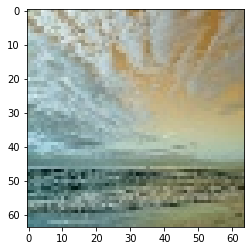

In [258]:
for image_path_test in image_paths_test:
    im=cv2.imread(image_path_test)
    plt.imshow(im)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        des_list_test.append((image_path_test,no_kp))
    else:   
        des_list_test.append((image_path_test,des))

In [259]:
# def gen_sift_features(gray_img):
#     #sift = cv2.xfeatures2d.SIFT_create()
#     # kp is the keypoints
#     #
#     # desc is the SIFT descriptors, they're 128-dimensional vectors
#     # that we can use for our final features
#     kp,des=brisk.detectAndCompute(im,None)
#     print(des)
#     return kp, des

# def show_sift_features(gray_img, color_img, kp):
#     return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# # generate SIFT keypoints and descriptors
# octo_front_kp, octo_front_desc = gen_sift_features(im)
# #octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

# #print 'Here are what our SIFT features look like for the front-view octopus image:'
# show_sift_features(im, im, octo_front_kp)

In [260]:
# im=cv2.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
# plt.imshow(im)
# print(im.shape)

In [261]:
print(len(des_list_test))

1500


In [262]:
des_list_test[11]

('./bonus-sml-2020/SML_Test/Test_11.jpg',
 array([[223, 255, 239, ..., 249, 177, 179],
        [107, 245, 191, ...,  77,  29,  24],
        [190, 252, 233, ...,   0, 241,  32],
        ...,
        [244, 255, 231, ...,   0,  16, 208],
        [  4, 122, 223, ...,   0,   0, 144],
        [127, 252, 235, ...,   0,  64, 192]], dtype=uint8))

In [263]:
descriptors_test=des_list_test[0][1]

In [264]:
for image_path_test,descriptor in des_list_test[1:]:
    descriptors_test=np.vstack((descriptors_test,descriptor))

In [265]:
test_features=np.zeros((len(des_list_test),k),"float32")
for i in range(len(des_list_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [266]:
nbr_occrrences_test=np.sum((test_features>0)*1,axis=0)
idf_test=np.array(np.log((1.0*len(image_paths_test)+1)/(1.0*nbr_occrrences_test+1)),"float32")

In [267]:
#test_features=constant_filter.transform(test_features)

In [268]:
print(clf)

BaggingClassifier(base_estimator=SVC(C=5, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=0.005, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=31, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)


In [269]:
#y_test = clf.predict(test_features)


In [270]:
model = grid.best_estimator_
y_test = model.predict(test_features)
print(y_test[:100])

['14' '12' '24' '22' '6' '19' '18' '12' '10' '12' '22' '8' '0' '13' '17'
 '12' '16' '4' '19' '13' '7' '19' '10' '1' '10' '2' '17' '24' '1' '8' '14'
 '17' '8' '19' '4' '10' '16' '13' '10' '5' '18' '19' '16' '19' '1' '17'
 '16' '11' '17' '14' '18' '0' '8' '10' '16' '8' '4' '13' '10' '13' '2' '4'
 '23' '23' '12' '10' '17' '23' '0' '6' '24' '7' '17' '10' '18' '17' '8'
 '7' '23' '17' '11' '17' '13' '8' '3' '20' '14' '4' '4' '6' '17' '5' '6'
 '19' '1' '18' '1' '4' '15' '17']


In [271]:
print(y_test[0:20])

['14' '12' '24' '22' '6' '19' '18' '12' '10' '12' '22' '8' '0' '13' '17'
 '12' '16' '4' '19' '13']


# next

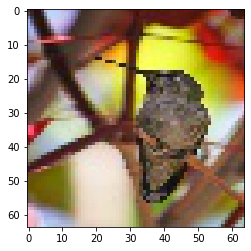

In [5]:
an_image = mpimg.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
rgb_weights = [0.2989, 0.5870, 0.1140] 
grayscale_image = np.dot(an_image[...,: 3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))
plt.imshow(an_image)

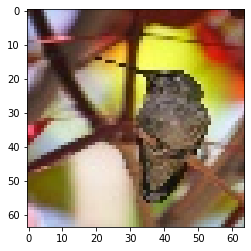

In [20]:
image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

(<matplotlib.axes._subplots.AxesSubplot at 0x11ec22b00>,
 <matplotlib.image.AxesImage at 0x11ecc29b0>)

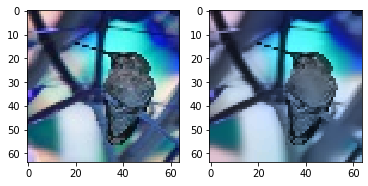

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)



plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)

(<matplotlib.axes._subplots.AxesSubplot at 0x11f800d68>,
 <matplotlib.image.AxesImage at 0x11f86b358>)

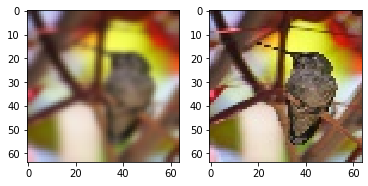

In [21]:
image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(image, (5, 5), 0)
plt.subplot(121),plt.imshow(blur)
plt.subplot(122),plt.imshow(image)

In [ ]:
blur = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
#blur = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.subplot(121),plt.imshow(thresh)
plt.subplot(122),plt.imshow(blur)

(<matplotlib.axes._subplots.AxesSubplot at 0x11fef9278>,
 <matplotlib.image.AxesImage at 0x11ff3a208>)

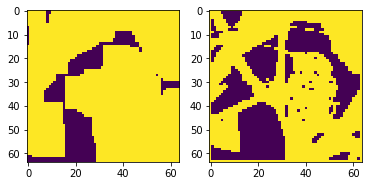

In [28]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
plt.subplot(121),plt.imshow(sure_bg)
plt.subplot(122),plt.imshow(thresh)

(<matplotlib.axes._subplots.AxesSubplot at 0x1200200b8>,
 <matplotlib.image.AxesImage at 0x120074cc0>)

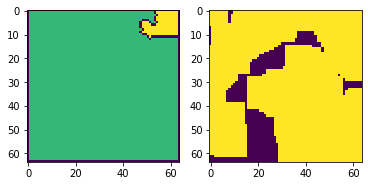

In [29]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Displaying markers on the image
plt.subplot(121),plt.imshow(markers)
plt.subplot(122),plt.imshow(sure_bg)

Original Dimensions :  (64, 64, 3)
Resized Dimensions :  (25, 25, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x1537bc978>,
 <matplotlib.image.AxesImage at 0x153779898>)

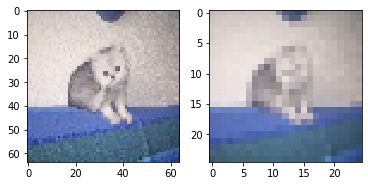

In [16]:
import cv2
 
img = cv2.imread('./bonus-sml-2020/SML_Test/Test_11.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(resized)

In [11]:
dst = cv2.fastNlMeansDenoisingColored(resized,None,10,10,7,21)

(<matplotlib.axes._subplots.AxesSubplot at 0x1533b1f60>,
 <matplotlib.image.AxesImage at 0x1533e8be0>)

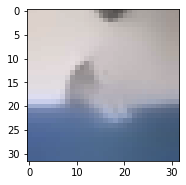

In [12]:
plt.subplot(122),plt.imshow(dst)

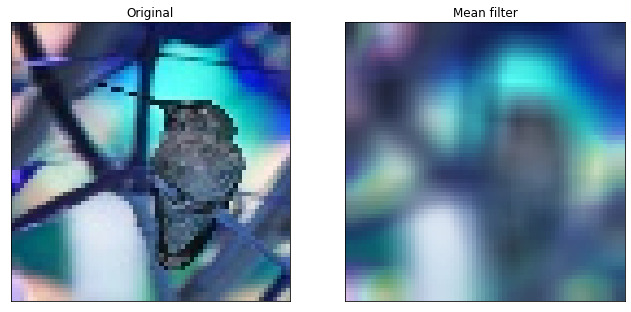

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

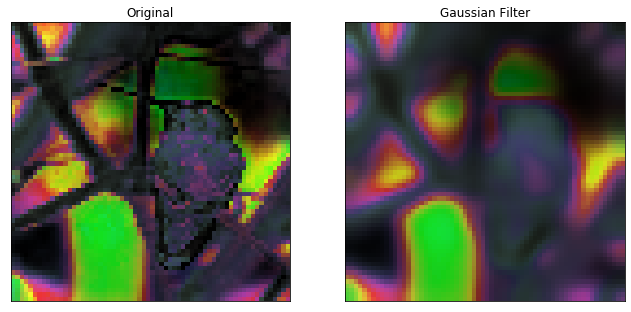

In [20]:
image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

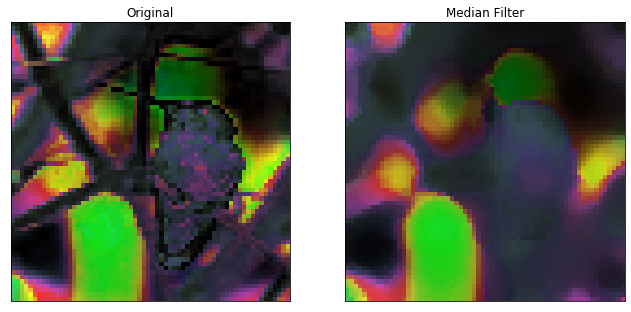

In [21]:
image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
im = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg',cv2.IMREAD_GRAYSCALE)
_,im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
# Calculate Moments
moments = cv2.moments(im)

# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [3]:
len(huMoments)

7

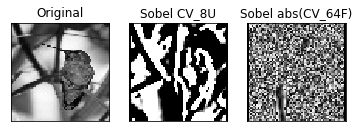

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

# next

(64, 64, 3)


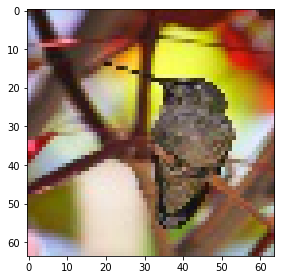

In [5]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('./bonus-sml-2020/SML_Test/Test_10.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


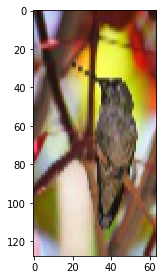

In [21]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [49]:
fd, hog_image = hog(resized_img, orientations=5, pixels_per_cell=(16, 16), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [50]:
print(fd.shape)

(420,)


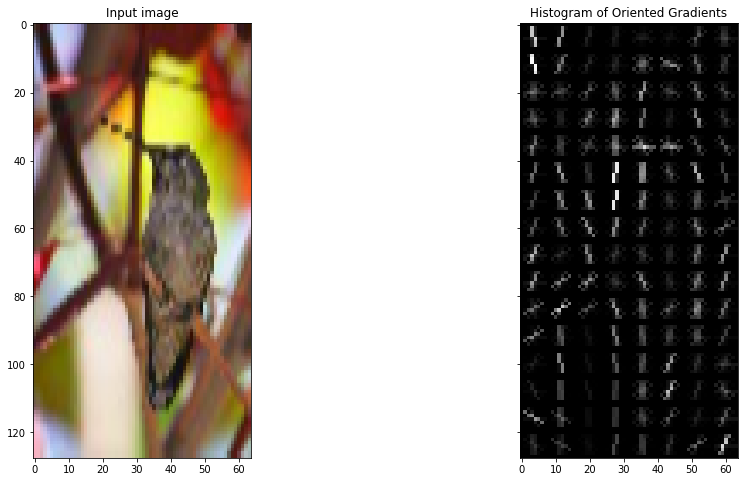

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# haralick

In [42]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

ModuleNotFoundError: No module named 'mahotas'

In [39]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

In [40]:

                # read the training image
                image = cv2.imread('./bonus-sml-2020/SML_Test/Test_10.jpg')

                # convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # extract haralick texture from the image
                features = extract_features(gray)

                print(features)

NameError: name 'mt' is not defined